In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
washtenaw_president = pd.read_csv('./washtenaw-president.txt')
washtenaw_straight_party = pd.read_csv('./washtenaw-straight-party.txt')

In [5]:
washtenaw_president

,precinct_name,biden,trump,jorgensen,blankenship,hawkins,de_la_fuente,rej,una
0,City of Ann Arbor. Ward 1. Precinct 1,829,102,3,0,1,0,0,1
1,City of Ann Arbor. Ward 1. Precinct 2,984,118,9,2,3,0,0,3
2,City of Ann Arbor. Ward 1. Precinct 3,648,42,1,0,2,0,0,4
3,City of Ann Arbor. Ward 1. Precinct 4,587,48,2,0,2,0,0,2
4,City of Ann Arbor. Ward 1. Precinct 5,1057,93,8,0,4,0,0,3
...,...,...,...,...,...,...,...,...,...
145,Ypsilanti Township. Precinct 15,959,476,11,4,5,2,0,5
146,Ypsilanti Township. Precinct 17,1736,528,19,2,5,0,0,7
147,Ypsilanti Township. Precinct 18,1704,628,32,4,11,0,0,7
148,Ypsilanti Township. Precinct 19,1744,668,37,0,11,0,0,10


In [6]:
washtenaw_straight_party['sp_total'] = (
    washtenaw_straight_party['dem'] +
    washtenaw_straight_party['rep'] +
    washtenaw_straight_party['lib'] +
    washtenaw_straight_party['ust'] +
    washtenaw_straight_party['wcp'] +
    washtenaw_straight_party['grn'] +
    washtenaw_straight_party['nat']
)

In [7]:
washtenaw_straight_party['percentage_republican'] = washtenaw_straight_party['rep'] / washtenaw_straight_party['sp_total']

In [8]:
washtenaw_president['total_votes'] = (
    washtenaw_president['biden'] +
    washtenaw_president['trump'] +
    washtenaw_president['jorgensen'] +
    washtenaw_president['blankenship'] +
    washtenaw_president['hawkins'] +
    washtenaw_president['de_la_fuente'] +
    washtenaw_president['rej'] +
    washtenaw_president['una']
)

washtenaw_president['trump_vote_percentage'] = washtenaw_president['trump'] / washtenaw_president['total_votes']

In [9]:
# Axes
straight_republican_percentages = washtenaw_straight_party['percentage_republican'].tolist()
trump_relative_performance = (washtenaw_president['trump_vote_percentage'] - washtenaw_straight_party['percentage_republican']).tolist()

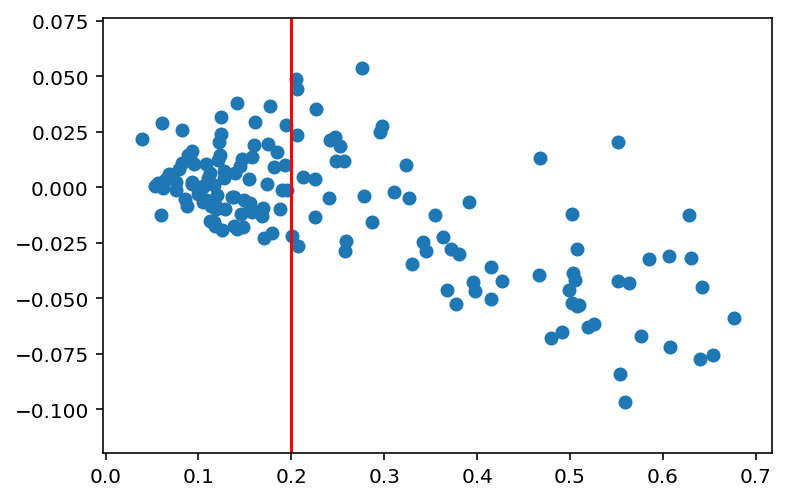

In [10]:
plt.scatter(
    straight_republican_percentages,
    trump_relative_performance
)

plt.axvline(x=0.2, color='red')

plt.show()